# CPSC4810 Team Project 
#### Leo Liang
#### Qirui Cao
#### Latesh Subramanayam

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.colors as mcol
import matplotlib.cm as cm

import plotly.express as px

## Section 1 Data Inspection and Cleaning

(description data sources for each dataset:)

### Inspect the county data set

In [2]:
dfCounty = pd.read_csv("data/us_county.csv")

In [3]:
dfCounty.head(5)

,fips,county,state,state_code,male,female,median_age,population,female_percentage,lat,long
0,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,-86.642730
1,1003,Baldwin County,Alabama,AL,101188,106919,42.8,208107,51.376936,30.727479,-87.722564
2,1005,Barbour County,Alabama,AL,13697,12085,39.9,25782,46.873788,31.869581,-85.393210
3,1007,Bibb County,Alabama,AL,12152,10375,39.9,22527,46.055844,32.998628,-87.126475
4,1009,Blount County,Alabama,AL,28434,29211,40.8,57645,50.673953,33.980869,-86.567380


In [4]:
print("County dataset has", dfCounty.shape[0], "rows and", dfCounty.shape[1], "columns in the dataset.")

County dataset has 3220 rows and 11 columns in the dataset.


In [5]:
print("The number of rows in the dataset is equal to the number of unique values in column 'fips':", 
      len(dfCounty) == dfCounty.fips.nunique())

The number of rows in the dataset is equal to the number of unique values in column 'fips': True


Since the number of rows of the dataframe is equal to the number of unique values for variable "fips". We can consider the column "fips" as the key of the dataframe. That is, each row in dataframe dfCounty represents a different US county. 

In [6]:
dfCounty.isnull().sum()

fips                  0
county                0
state                 0
state_code           79
male                  0
female                0
median_age            0
population            0
female_percentage     0
lat                   0
long                  0
dtype: int64

Then, by running the total number of missing values for each variable, we find out that there are 79 missing values for "state_code". Then we need to check those rows containing missing values. 

In [7]:
dfCounty[dfCounty.state_code.isnull()]['state'].value_counts()

Puerto Rico             78
District of Columbia     1
Name: state, dtype: int64

In [8]:
print("Puerto Rico has", len(dfCounty[dfCounty.state == "Puerto Rico"]), "rows in the dataframe. ")

Puerto Rico has 78 rows in the dataframe. 


In [9]:
print("District of Columbia", len(dfCounty[dfCounty.state == "District of Columbia"]), "rows in the dataframe")

District of Columbia 1 rows in the dataframe


We find out that the only two states which do not have a state code are Puerto Rico and District of Columbia. By comparing the number of rows for two states, and the number of missing value occurance, we can be sure that state Puerto Rico and District of Columbia do not have state code. 

This is because both areas are not a US state, then they do not have a US state code. Since Puerto Rico is not part of 50 states + 1 disctrict, we exclude those observations from the project. 

In [10]:
dfCounty = dfCounty.drop(dfCounty[dfCounty.state == "Puerto Rico"].index)
dfCounty.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

Then, we aggregate the population by all states to replicate the raw dataframe with state-level information.  

In [11]:
state_pop = pd.DataFrame(dfCounty.groupby('state')[['male','female','population']].sum())
state_pop["female_proportion"] = state_pop.female/state_pop.population
state_pop.reset_index(level=0, inplace=True)
state_pop

,state,male,female,population,female_proportion
0,Alabama,2355799,2508881,4864680,0.515734
1,Alaska,385579,352937,738516,0.477900
2,Arizona,3453439,3493246,6946685,0.502865
3,Arkansas,1468412,1522259,2990671,0.509002
4,California,19453769,19694991,39148760,0.503081
5,Colorado,2780831,2750310,5531141,0.497241
6,Connecticut,1747131,1834373,3581504,0.512180
7,Delaware,459570,489925,949495,0.515985
8,District of Columbia,324881,359617,684498,0.525373
9,Florida,10071925,10526214,20598139,0.511027


### Inspect the Poverty data 

In [12]:
dfPoverty = pd.read_csv("data/PovertyEstimates_us_county.csv")

In [13]:
dfPoverty.head(5)

,FIPStxt,Stabr,Area_name,Rural-urban_Continuum_Code_2003,Urban_Influence_Code_2003,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2018,CI90LBAll_2018,CI90UBALL_2018,...,CI90UB517P_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,POV04_2018,CI90LB04_2018,CI90UB04_2018,PCTPOV04_2018,CI90LB04P_2018,CI90UB04P_2018
0,0,US,United States,NaN,NaN,NaN,NaN,41852315,41619366,42085264,...,17.2,61937,61843,62031,3758704.0,3714862.0,3802546.0,19.5,19.3,19.7
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,801758,785668,817848,...,23.7,49881,49123,50639,73915.0,69990.0,77840.0,26.0,24.6,27.4
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,7587,6334,8840,...,23.9,59338,53628,65048,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,21069,17390,24748,...,16.9,57588,54437,60739,NaN,NaN,NaN,NaN,NaN,NaN
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,6788,5662,7914,...,45.9,34382,31157,37607,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dfPoverty.columns

Index(['FIPStxt', 'Stabr', 'Area_name', 'Rural-urban_Continuum_Code_2003',
       'Urban_Influence_Code_2003', 'Rural-urban_Continuum_Code_2013',
       'Urban_Influence_Code_2013', 'POVALL_2018', 'CI90LBAll_2018',
       'CI90UBALL_2018', 'PCTPOVALL_2018', 'CI90LBALLP_2018',
       'CI90UBALLP_2018', 'POV017_2018', 'CI90LB017_2018', 'CI90UB017_2018',
       'PCTPOV017_2018', 'CI90LB017P_2018', 'CI90UB017P_2018', 'POV517_2018',
       'CI90LB517_2018', 'CI90UB517_2018', 'PCTPOV517_2018', 'CI90LB517P_2018',
       'CI90UB517P_2018', 'MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018',
       'POV04_2018', 'CI90LB04_2018', 'CI90UB04_2018', 'PCTPOV04_2018',
       'CI90LB04P_2018', 'CI90UB04P_2018'],
      dtype='object')

Then, we altered the dataset to keep the relevant columns.

In [15]:
dfPoverty = dfPoverty[['FIPStxt', 'Stabr', 'Area_name', 'Rural-urban_Continuum_Code_2013', 'Urban_Influence_Code_2013', 
                        'POVALL_2018', 'PCTPOVALL_2018', 'POV017_2018', 'PCTPOV017_2018', 'MEDHHINC_2018']]

In [16]:
print("Poverty dataset has", dfPoverty.shape[0], "rows and", dfPoverty.shape[1], "columns in the dataset.")

Poverty dataset has 3193 rows and 10 columns in the dataset.


In [17]:
print("The number of rows in the dataset is equal to the number of unique values in column 'fips':", 
      len(dfPoverty) == dfPoverty["FIPStxt"].nunique())

The number of rows in the dataset is equal to the number of unique values in column 'fips': True


Similarly, since the number of rows of the dataframe is equal to the number of unique values for variable "FIPStxt". We can consider the column "FIPStxt" as the key of the dataframe. That is, each row in dataframe dfCounty represents a different US area. 

In [18]:
dfPoverty.isnull().sum()

FIPStxt                             0
Stabr                               0
Area_name                           0
Rural-urban_Continuum_Code_2013    52
Urban_Influence_Code_2013          52
POVALL_2018                         0
PCTPOVALL_2018                      0
POV017_2018                         0
PCTPOV017_2018                      0
MEDHHINC_2018                       0
dtype: int64

Then, by running the total number of missing values for each variable, we find out that there are 52 missing values for 2013's "RUCC" and "UIC". Then we need to check those rows containing missing values.

In [19]:
dfPoverty[dfPoverty["Rural-urban_Continuum_Code_2013"].isna()]["Area_name"]

0              United States
1                    Alabama
69                    Alaska
99                   Arizona
115                 Arkansas
191               California
250                 Colorado
315              Connecticut
324                 Delaware
328     District of Columbia
330                  Florida
398                  Georgia
558                   Hawaii
563                    Idaho
608                 Illinois
711                  Indiana
804                     Iowa
904                   Kansas
1010                Kentucky
1131               Louisiana
1196                   Maine
1213                Maryland
1238           Massachusetts
1253                Michigan
1337               Minnesota
1425             Mississippi
1508                Missouri
1624                 Montana
1681                Nebraska
1775                  Nevada
1793           New Hampshire
1804              New Jersey
1826              New Mexico
1860                New York
1923          

In [20]:
dfPoverty[dfPoverty["Urban_Influence_Code_2013"].isna()]["Area_name"]

0              United States
1                    Alabama
69                    Alaska
99                   Arizona
115                 Arkansas
191               California
250                 Colorado
315              Connecticut
324                 Delaware
328     District of Columbia
330                  Florida
398                  Georgia
558                   Hawaii
563                    Idaho
608                 Illinois
711                  Indiana
804                     Iowa
904                   Kansas
1010                Kentucky
1131               Louisiana
1196                   Maine
1213                Maryland
1238           Massachusetts
1253                Michigan
1337               Minnesota
1425             Mississippi
1508                Missouri
1624                 Montana
1681                Nebraska
1775                  Nevada
1793           New Hampshire
1804              New Jersey
1826              New Mexico
1860                New York
1923          

By observing the missing values in both columns, the corresponding area names are states and US itself. The missing values are due to the fact that the country US itself and states are not applied to the county-level code, as it only applies to counties. 

Meanwhile, Rural-urban Continuum Code 2013 and Urban Influence Code 2013 are all categorical variables, which have their corresponding categories. (Please see documents below) Then, we need to map the code to their corresponding description. 

Rural-Urban Continuum Code: https://www.ers.usda.gov/data-products/rural-urban-continuum-codes/documentation/
Urban Influence Code: https://www.ers.usda.gov/data-products/urban-influence-codes/documentation.aspx.

In [21]:
RUCC = {1: "Level 1", 
           2: "Level 2",
           3: "Level 3",
           4: "Level 4",
           5: "Level 5",
           6: "Level 6", 
           7: "Level 7", 
           8: "Level 8",
           9: "Level 9"
          }

UIC = {1: "Level 1",
       2: "Level 2",
       3: "Level 3",
       4: "Level 4",
       5: "Level 5",
       6: "Level 6",
       7: "Level 7",
       8: "Level 8",
       9: "Level 9",
       10: "Level 10",
       11: "Level 11",
       12: "Level 12",
       }

dfPoverty["Rural-urban_Continuum_Code_2013"] = dfPoverty["Rural-urban_Continuum_Code_2013"].map(RUCC)
dfPoverty["Urban_Influence_Code_2013"] = dfPoverty["Urban_Influence_Code_2013"].map(UIC)

In [22]:
dfPoverty.head(5)

,FIPStxt,Stabr,Area_name,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2018,PCTPOVALL_2018,POV017_2018,PCTPOV017_2018,MEDHHINC_2018
0,0,US,United States,NaN,NaN,41852315,13.1,12997532,18.0,61937
1,1000,AL,Alabama,NaN,NaN,801758,16.8,255613,23.9,49881
2,1001,AL,Autauga County,Level 2,Level 2,7587,13.8,2509,19.3,59338
3,1003,AL,Baldwin County,Level 3,Level 2,21069,9.8,6442,13.9,57588
4,1005,AL,Barbour County,Level 6,Level 6,6788,30.9,2242,43.9,34382


In [23]:
dfPoverty.describe()

,FIPStxt,POVALL_2018,PCTPOVALL_2018,POV017_2018,PCTPOV017_2018,MEDHHINC_2018
count,3193.000000,3.193000e+03,3193.000000,3.193000e+03,3193.000000,3193.000000
mean,30356.223301,3.932257e+04,15.125274,1.221190e+04,21.045443,52944.895709
std,15178.992102,7.583740e+05,6.092508,2.358859e+05,8.862190,13878.755803
min,0.000000,5.000000e+00,2.600000,5.000000e+00,2.500000,25385.000000
25%,18173.000000,1.621000e+03,10.800000,5.030000e+02,14.500000,43783.000000
50%,29175.000000,3.876000e+03,14.100000,1.200000e+03,20.100000,50748.000000
75%,45075.000000,9.874000e+03,18.300000,2.966000e+03,26.200000,59020.000000
max,56045.000000,4.185232e+07,54.000000,1.299753e+07,68.300000,140382.000000


### Inspect COVID case and death data

In [24]:
dfcovCnty = pd.read_csv("data/covid_us_county.csv")

In [25]:
dfcovCnty.head(5)

,fips,county,state,lat,long,date,cases,state_code,deaths
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0


In [26]:
print("COVID dataset has", dfcovCnty.shape[0], "rows and", dfcovCnty.shape[1], "columns in the dataset.")

COVID dataset has 1858152 rows and 9 columns in the dataset.


This data contains the county-level cumulative cases and deaths starting from January 22nd, 2020. Let's take the current date, and inspect the missing values

In [27]:
dfcovCnty_current = dfcovCnty[dfcovCnty['date'] == '2021-07-30']
dfcovCnty_current.head()

,fips,county,state,lat,long,date,cases,state_code,deaths
555,1001.0,Autauga,Alabama,32.539527,-86.644082,2021-07-30,7479,AL,114
1111,1003.0,Baldwin,Alabama,30.727750,-87.722071,2021-07-30,24499,AL,328
1667,1005.0,Barbour,Alabama,31.868263,-85.387129,2021-07-30,2462,AL,61
2223,1007.0,Bibb,Alabama,32.996421,-87.125115,2021-07-30,2845,AL,65
2779,1009.0,Blount,Alabama,33.982109,-86.567906,2021-07-30,7266,AL,139


In [28]:
print("current date COVID dataset has", dfcovCnty_current.shape[0], "rows and", dfcovCnty_current.shape[1], "columns in the dataset.")

current date COVID dataset has 3342 rows and 9 columns in the dataset.


In [29]:
dfcovCnty_current.isnull().sum()

fips          10
county         6
state          0
lat            0
long           0
date           0
cases          0
state_code    89
deaths         0
dtype: int64

There are 10 missing values in column "fips", 6 in column "county" and 89 in column "state_code". We need to check all the rows containing these missing values. 

In [30]:
dfcovCnty_current[dfcovCnty_current.fips.isnull()]

,fips,county,state,lat,long,date,cases,state_code,deaths
706119,NaN,Dukes and Nantucket,Massachusetts,41.406747,-70.687635,2021-07-30,3009,MA,6
726691,NaN,Federal Correctional Institution (FCI),Michigan,0.000000,0.000000,2021-07-30,320,MI,5
744483,NaN,Michigan Department of Corrections (MDOC),Michigan,0.000000,0.000000,2021-07-30,26770,MI,155
886263,NaN,Kansas City,Missouri,39.099700,-94.578600,2021-07-30,49320,MO,617
1644091,NaN,Bear River,Utah,41.521068,-113.083282,2021-07-30,23219,UT,114
1646871,NaN,Central Utah,Utah,39.372319,-111.575868,2021-07-30,9650,UT,72
1657435,NaN,Southeast Utah,Utah,38.996171,-110.701396,2021-07-30,3975,UT,31
1657991,NaN,Southwest Utah,Utah,37.854472,-111.441876,2021-07-30,31376,UT,289
1659659,NaN,TriCounty,Utah,40.124915,-109.517442,2021-07-30,5053,UT,42
1664107,NaN,Weber-Morgan,Utah,41.271160,-111.914512,2021-07-30,33602,UT,233


Since in the merging stage of our project, we will merge by fips, which is the key column for most of our county-level dataframe, we will remove those rows containing missing values in fips. 

In [31]:
dfcovCnty_current[dfcovCnty_current.county.isnull()]

,fips,county,state,lat,long,date,cases,state_code,deaths
57267,60.0,NaN,American Samoa,-14.2710,-170.1320,2021-07-30,0,NaN,0
188483,88888.0,NaN,Diamond Princess,0.0000,0.0000,2021-07-30,49,NaN,0
318587,99999.0,NaN,Grand Princess,0.0000,0.0000,2021-07-30,103,NaN,3
319143,66.0,NaN,Guam,13.4443,144.7937,2021-07-30,8541,NaN,143
1180943,69.0,NaN,Northern Mariana Islands,15.0979,145.6739,2021-07-30,183,NaN,2
1673559,78.0,NaN,Virgin Islands,18.3358,-64.8963,2021-07-30,4606,NaN,37


Since the missing values in county indicates two cruise ships and four areas outside 50 states + 1 district, we remove those rows as well. 

In [32]:
dfcovCnty=dfcovCnty.dropna(subset=['fips','county'])
dfcovCnty_current=dfcovCnty_current.dropna(subset=['fips','county'])

Then, we checked the rows with missing state codes, and found out that only Puerto Rico and District of Columbia don't have state code. It is the same case as the previous situation where both areas are not a US state, thus there are no state codes. And we removed rows with Puerto Rico as well.

In [33]:
dfcovCnty_current[dfcovCnty_current.state_code.isnull()].state.value_counts()

Puerto Rico             80
District of Columbia     3
Name: state, dtype: int64

In [34]:
print("Puerto Rico has", len(dfcovCnty_current[dfcovCnty_current.state == "Puerto Rico"]), "rows in the dataframe. ")

Puerto Rico has 80 rows in the dataframe. 


In [35]:
print("District of Columbia", len(dfcovCnty_current[dfcovCnty_current.state == "District of Columbia"]), "rows in the dataframe")

District of Columbia 3 rows in the dataframe


In [36]:
dfcovCnty = dfcovCnty.drop(dfcovCnty[dfcovCnty.state == "Puerto Rico"].index)
dfcovCnty_current = dfcovCnty[dfcovCnty.date == '2021-07-30']
dfcovCnty.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [37]:
print("Now, the number of rows in the dataset is equal to the number of unique values in column 'fips':", 
      len(dfcovCnty_current) == dfcovCnty_current.fips.nunique())

Now, the number of rows in the dataset is equal to the number of unique values in column 'fips': True


Since the number of rows of the dataframe is equal to the number of unique values for variable "fips". We can consider the column "fips" as the key of the dataframe. That is, each row in dataframe current represents a different US county.

In [38]:
dfcovCnty_current.describe()

,fips,lat,long,cases,deaths
count,3246.000000,3246.000000,3246.000000,3.246000e+03,3246.000000
mean,32083.336106,37.260840,-89.428180,1.065934e+04,187.518792
std,17742.211826,8.522405,20.596120,3.834142e+04,723.357640
min,1001.000000,0.000000,-174.159600,0.000000e+00,0.000000
25%,19041.500000,34.263872,-98.062361,1.020000e+03,18.000000
50%,30046.000000,38.162993,-89.900575,2.568500e+03,49.000000
75%,47008.500000,41.685722,-82.841249,6.731750e+03,117.000000
max,90056.000000,69.314792,0.000000,1.297087e+06,24691.000000


Similar to the county data, we also aggregated the cumulative cases and deaths by state level to replicate the dataframe. 

In [39]:
dfcovSt = pd.DataFrame(dfcovCnty.groupby(["state", "date"])[["cases", "deaths"]].sum())
dfcovSt.reset_index(inplace=True)
dfcovSt.head()

,state,date,cases,deaths
0,Alabama,2020-01-22,0,0
1,Alabama,2020-01-23,0,0
2,Alabama,2020-01-24,0,0
3,Alabama,2020-01-25,0,0
4,Alabama,2020-01-26,0,0


In [40]:
dfcovSt_current = dfcovSt[dfcovSt.date == "2021-07-30"]
dfcovSt_current

,state,date,cases,deaths
555,Alabama,2021-07-30,577463,11510
1111,Alaska,2021-07-30,75486,389
1667,Arizona,2021-07-30,925169,18224
2223,Arkansas,2021-07-30,385113,6123
2779,California,2021-07-30,3956303,64423
3335,Colorado,2021-07-30,575082,6945
3891,Connecticut,2021-07-30,354335,8293
4447,Delaware,2021-07-30,111275,1830
5003,District of Columbia,2021-07-30,50398,1149
5559,Florida,2021-07-30,2634234,39079


### Inspect the Vaccination Data

In [41]:
dfvac = pd.read_csv("data/us_state_vaccinations.csv")

In [42]:
dfvac.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN


In [43]:
print("Vaccine dataset has", dfvac.shape[0], "rows and", dfvac.shape[1], "columns in the dataset.")

Vaccine dataset has 13088 rows and 14 columns in the dataset.


Since the dataset contains the time series state level data of US vaccination, we subsetted the current date as an example to examine the data.

In [44]:
dfvac_current = dfvac[dfvac.date == '2021-07-30']
dfvac_current.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
199,2021-07-30,Alabama,3586810.0,5092510.0,2116551.0,34.33,73.15,1683367.0,43.17,103.86,28844.0,13131.0,2678.0,0.704
400,2021-07-30,Alaska,696377.0,853805.0,376154.0,45.48,95.19,332678.0,51.42,116.71,1214.0,837.0,1144.0,0.816
601,2021-07-30,American Samoa,51670.0,55830.0,28768.0,42.31,92.78,23560.0,51.66,100.25,0.0,229.0,4112.0,0.925
802,2021-07-30,Arizona,7085856.0,8540830.0,3853257.0,45.19,97.35,3289110.0,52.94,117.34,17540.0,12063.0,1657.0,0.830
1003,2021-07-30,Arkansas,2432736.0,3004150.0,1405459.0,36.29,80.61,1095214.0,46.57,99.55,10935.0,9842.0,3261.0,0.810


In [45]:
dfvac_current.isnull().sum()

date                                   0
location                               0
total_vaccinations                     0
total_distributed                      1
people_vaccinated                      1
people_fully_vaccinated_per_hundred    4
total_vaccinations_per_hundred         4
people_fully_vaccinated                1
people_vaccinated_per_hundred          4
distributed_per_hundred                4
daily_vaccinations_raw                 0
daily_vaccinations                     0
daily_vaccinations_per_million         4
share_doses_used                       1
dtype: int64

Looking at the unique locations, we will only be keeping the states and the capital city

In [46]:
dfvac_current.location.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'Bureau of Prisons', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'Dept of Defense', 'District of Columbia',
       'Federated States of Micronesia', 'Florida', 'Georgia', 'Guam',
       'Hawaii', 'Idaho', 'Illinois', 'Indian Health Svc', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Long Term Care', 'Louisiana',
       'Maine', 'Marshall Islands', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York State', 'North Carolina', 'North Dakota',
       'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Republic of Palau', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'United States', 'Utah', 'Vermont', 'Veterans Health',
       'Virgin Islands', 'Virginia', 'Washington', 'West V

Only location where it is a state will be kept, and also we need to change New York State to New York in order to match with other datasets. 

In [47]:
dfvac_current = dfvac_current[~dfvac_current.location.isin(['American Samoa','Bureau of Prisons','Dept of Defense','Federated States of Micronesia',
               'Indian Health Svc','Long Term Care','Marshall Islands','Northern Mariana Islands',
               'Puerto Rico', 'Republic of Palau','United States','Veterans Health','Guam','Virgin Islands'])]
dfvac_current.location[dfvac_current.location == "New York State"] = "New York"
dfvac_current.location.nunique()

51

Similarly, we removed those locations from the time series dataframe as well. 

In [48]:
dfvac = dfvac[~dfvac.location.isin(['American Samoa','Bureau of Prisons','Dept of Defense','Federated States of Micronesia',
               'Indian Health Svc','Long Term Care','Marshall Islands','Northern Mariana Islands',
               'Puerto Rico', 'Republic of Palau','United States','Veterans Health','Guam','Virgin Islands'])]
dfvac.location[dfvac.location == "New York State"] = "New York"
dfvac.location.nunique()

51

In [49]:
dfvac[dfvac.location == "New York"]

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
8040,2021-01-12,New York,579532.0,1622100.0,543014.0,0.19,2.98,36422.0,2.79,8.34,NaN,NaN,NaN,0.357
8041,2021-01-13,New York,632473.0,1796850.0,587865.0,0.23,3.25,44512.0,3.02,9.24,52941.00,52941.0,2721.0,0.352
8042,2021-01-14,New York,688576.0,1872625.0,617596.0,NaN,3.54,NaN,3.17,9.63,56103.00,54522.0,2803.0,0.368
8043,2021-01-15,New York,757466.0,1884325.0,671311.0,0.38,3.89,73523.0,3.45,9.69,68890.00,59311.0,3049.0,0.402
8044,2021-01-16,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60713.25,59662.0,3067.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8236,2021-07-27,New York,22775948.0,24823865.0,12168754.0,56.72,117.08,11033818.0,62.55,127.61,43644.00,36471.0,1875.0,0.918
8237,2021-07-28,New York,22820585.0,24861515.0,12191988.0,56.83,117.31,11056206.0,62.67,127.80,44637.00,37570.0,1931.0,0.918
8238,2021-07-29,New York,22860905.0,24980615.0,12216355.0,56.92,117.52,11073293.0,62.80,128.41,40320.00,37158.0,1910.0,0.915
8239,2021-07-30,New York,22902722.0,25076125.0,12242044.0,57.01,117.73,11091103.0,62.93,128.90,41817.00,37673.0,1937.0,0.913


checking for missing values again. We do not have missing values anymore.

In [50]:
dfvac_current.isnull().sum()

date                                   0
location                               0
total_vaccinations                     0
total_distributed                      0
people_vaccinated                      0
people_fully_vaccinated_per_hundred    0
total_vaccinations_per_hundred         0
people_fully_vaccinated                0
people_vaccinated_per_hundred          0
distributed_per_hundred                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
daily_vaccinations_per_million         0
share_doses_used                       0
dtype: int64

now we have the 50 states and the capital city in the data

In [51]:
print("Now, the number of rows in the dataset is equal to the number of unique values in column 'location':", 
      len(dfvac_current) == dfvac_current.location.nunique())

Now, the number of rows in the dataset is equal to the number of unique values in column 'location': True


Since the number of rows of the dataframe is equal to the number of unique values for variable "location". We can consider the column "location" as the key column of the dataframe. That is, each row in dataframe current represents a different US county.

In [52]:
dfvac = dfvac[['date', 'location', 'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'daily_vaccinations',
       'daily_vaccinations_per_million']]

In [53]:
dfvac_current = dfvac_current[['date', 'location', 'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'daily_vaccinations',
       'daily_vaccinations_per_million']]

## Merge county-level data

#### Merge the current county-level data
Merge County info with covid cases by county (current only)

In [54]:
mergeCounty = pd.merge(dfCounty, dfcovCnty_current, how='inner', on='fips', validate = "1:1")
mergeCounty.head(5)

,fips,county_x,state_x,state_code_x,male,female,median_age,population,female_percentage,lat_x,long_x,county_y,state_y,lat_y,long_y,date,cases,state_code_y,deaths
0,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,-86.642730,Autauga,Alabama,32.539527,-86.644082,2021-07-30,7479,AL,114
1,1003,Baldwin County,Alabama,AL,101188,106919,42.8,208107,51.376936,30.727479,-87.722564,Baldwin,Alabama,30.727750,-87.722071,2021-07-30,24499,AL,328
2,1005,Barbour County,Alabama,AL,13697,12085,39.9,25782,46.873788,31.869581,-85.393210,Barbour,Alabama,31.868263,-85.387129,2021-07-30,2462,AL,61
3,1007,Bibb County,Alabama,AL,12152,10375,39.9,22527,46.055844,32.998628,-87.126475,Bibb,Alabama,32.996421,-87.125115,2021-07-30,2845,AL,65
4,1009,Blount County,Alabama,AL,28434,29211,40.8,57645,50.673953,33.980869,-86.567380,Blount,Alabama,33.982109,-86.567906,2021-07-30,7266,AL,139


Merge the above with poverty data

In [55]:
mergeCouPov = pd.merge(mergeCounty, dfPoverty, how='inner', left_on='fips', right_on='FIPStxt', validate = "1:1")
mergeCouPov.head(5)

,fips,county_x,state_x,state_code_x,male,female,median_age,population,female_percentage,lat_x,...,FIPStxt,Stabr,Area_name,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2018,PCTPOVALL_2018,POV017_2018,PCTPOV017_2018,MEDHHINC_2018
0,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,...,1001,AL,Autauga County,Level 2,Level 2,7587,13.8,2509,19.3,59338
1,1003,Baldwin County,Alabama,AL,101188,106919,42.8,208107,51.376936,30.727479,...,1003,AL,Baldwin County,Level 3,Level 2,21069,9.8,6442,13.9,57588
2,1005,Barbour County,Alabama,AL,13697,12085,39.9,25782,46.873788,31.869581,...,1005,AL,Barbour County,Level 6,Level 6,6788,30.9,2242,43.9,34382
3,1007,Bibb County,Alabama,AL,12152,10375,39.9,22527,46.055844,32.998628,...,1007,AL,Bibb County,Level 1,Level 1,4400,21.8,1238,27.8,46064
4,1009,Blount County,Alabama,AL,28434,29211,40.8,57645,50.673953,33.980869,...,1009,AL,Blount County,Level 1,Level 1,7527,13.2,2374,18.0,50412


In [56]:
mergeCouPov.isnull().sum()

fips                               0
county_x                           0
state_x                            0
state_code_x                       1
male                               0
female                             0
median_age                         0
population                         0
female_percentage                  0
lat_x                              0
long_x                             0
county_y                           0
state_y                            0
lat_y                              0
long_y                             0
date                               0
cases                              0
state_code_y                       1
deaths                             0
FIPStxt                            0
Stabr                              0
Area_name                          0
Rural-urban_Continuum_Code_2013    0
Urban_Influence_Code_2013          0
POVALL_2018                        0
PCTPOVALL_2018                     0
POV017_2018                        0
P

Then we checked the missing values and found out that the missing values occur due to the fact that District of Columbia does not have a state code. 

In [57]:
mergeCouPov[mergeCouPov.state_code_x.isnull()]

,fips,county_x,state_x,state_code_x,male,female,median_age,population,female_percentage,lat_x,...,FIPStxt,Stabr,Area_name,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2018,PCTPOVALL_2018,POV017_2018,PCTPOV017_2018,MEDHHINC_2018
319,11001,District of Columbia,District of Columbia,NaN,324881,359617,33.9,684498,52.537334,38.904734,...,11001,DC,District of Columbia,Level 1,Level 1,107806,16.1,30803,24.5,82533


In [58]:
mergeCouPov[mergeCouPov.state_code_y.isnull()]

,fips,county_x,state_x,state_code_x,male,female,median_age,population,female_percentage,lat_x,...,FIPStxt,Stabr,Area_name,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2018,PCTPOVALL_2018,POV017_2018,PCTPOV017_2018,MEDHHINC_2018
319,11001,District of Columbia,District of Columbia,NaN,324881,359617,33.9,684498,52.537334,38.904734,...,11001,DC,District of Columbia,Level 1,Level 1,107806,16.1,30803,24.5,82533


Then, we removed some of the redundant columns and kept the rest.

In [59]:
county_current = mergeCouPov[['fips', 'county_x', 'state_x', 'state_code_x', 'male', 'female',
       'median_age', 'population', 'female_percentage', 'lat_x', 'long_x', 'date', 'cases',
       'deaths', 'Rural-urban_Continuum_Code_2013', 'Urban_Influence_Code_2013',
       'POVALL_2018', 'PCTPOVALL_2018', 'POV017_2018', 'PCTPOV017_2018',
       'MEDHHINC_2018']]

In [60]:
county_current.head(5)

,fips,county_x,state_x,state_code_x,male,female,median_age,population,female_percentage,lat_x,...,date,cases,deaths,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2018,PCTPOVALL_2018,POV017_2018,PCTPOV017_2018,MEDHHINC_2018
0,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,...,2021-07-30,7479,114,Level 2,Level 2,7587,13.8,2509,19.3,59338
1,1003,Baldwin County,Alabama,AL,101188,106919,42.8,208107,51.376936,30.727479,...,2021-07-30,24499,328,Level 3,Level 2,21069,9.8,6442,13.9,57588
2,1005,Barbour County,Alabama,AL,13697,12085,39.9,25782,46.873788,31.869581,...,2021-07-30,2462,61,Level 6,Level 6,6788,30.9,2242,43.9,34382
3,1007,Bibb County,Alabama,AL,12152,10375,39.9,22527,46.055844,32.998628,...,2021-07-30,2845,65,Level 1,Level 1,4400,21.8,1238,27.8,46064
4,1009,Blount County,Alabama,AL,28434,29211,40.8,57645,50.673953,33.980869,...,2021-07-30,7266,139,Level 1,Level 1,7527,13.2,2374,18.0,50412


#### Merge time series county-level data

In [61]:
mergeCountyts = pd.merge(dfCounty, dfcovCnty, how='inner', on='fips', validate = "1:m")
mergeCountyts.head(5)

,fips,county_x,state_x,state_code_x,male,female,median_age,population,female_percentage,lat_x,long_x,county_y,state_y,lat_y,long_y,date,cases,state_code_y,deaths
0,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,-86.64273,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
1,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,-86.64273,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,-86.64273,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0
3,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,-86.64273,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0
4,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,-86.64273,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0


In [62]:
mergeCouPovts = pd.merge(mergeCountyts, dfPoverty, how='inner', left_on='fips', right_on='FIPStxt', validate = "m:1")
mergeCouPovts.head(5)

,fips,county_x,state_x,state_code_x,male,female,median_age,population,female_percentage,lat_x,...,FIPStxt,Stabr,Area_name,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2018,PCTPOVALL_2018,POV017_2018,PCTPOV017_2018,MEDHHINC_2018
0,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,...,1001,AL,Autauga County,Level 2,Level 2,7587,13.8,2509,19.3,59338
1,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,...,1001,AL,Autauga County,Level 2,Level 2,7587,13.8,2509,19.3,59338
2,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,...,1001,AL,Autauga County,Level 2,Level 2,7587,13.8,2509,19.3,59338
3,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,...,1001,AL,Autauga County,Level 2,Level 2,7587,13.8,2509,19.3,59338
4,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,...,1001,AL,Autauga County,Level 2,Level 2,7587,13.8,2509,19.3,59338


In [63]:
mergeCouPovts.isnull().sum()

fips                                 0
county_x                             0
state_x                              0
state_code_x                       556
male                                 0
female                               0
median_age                           0
population                           0
female_percentage                    0
lat_x                                0
long_x                               0
county_y                             0
state_y                              0
lat_y                                0
long_y                               0
date                                 0
cases                                0
state_code_y                       556
deaths                               0
FIPStxt                              0
Stabr                                0
Area_name                            0
Rural-urban_Continuum_Code_2013      0
Urban_Influence_Code_2013            0
POVALL_2018                          0
PCTPOVALL_2018           

In [64]:
mergeCouPovts[mergeCouPovts.state_code_x.isnull()].county_x.unique()

array(['District of Columbia'], dtype=object)

In [65]:
mergeCouPovts[mergeCouPovts.state_code_y.isnull()].county_x.unique()

array(['District of Columbia'], dtype=object)

Similarly, the missing values here are also due to District of Columbia not having a state code. 

In [66]:
county_ts = mergeCouPovts[['fips', 'county_x', 'state_x', 'state_code_x', 'male', 'female',
       'median_age', 'population', 'female_percentage', 'lat_x', 'long_x', 'date', 'cases',
       'deaths', 'Rural-urban_Continuum_Code_2013', 'Urban_Influence_Code_2013',
       'POVALL_2018', 'PCTPOVALL_2018', 'POV017_2018', 'PCTPOV017_2018',
       'MEDHHINC_2018']]

Also, we removed the redundant columns like the current data. 

In [67]:
county_ts.head()

,fips,county_x,state_x,state_code_x,male,female,median_age,population,female_percentage,lat_x,...,date,cases,deaths,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2018,PCTPOVALL_2018,POV017_2018,PCTPOV017_2018,MEDHHINC_2018
0,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,...,2020-01-22,0,0,Level 2,Level 2,7587,13.8,2509,19.3,59338
1,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,...,2020-01-23,0,0,Level 2,Level 2,7587,13.8,2509,19.3,59338
2,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,...,2020-01-24,0,0,Level 2,Level 2,7587,13.8,2509,19.3,59338
3,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,...,2020-01-25,0,0,Level 2,Level 2,7587,13.8,2509,19.3,59338
4,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,...,2020-01-26,0,0,Level 2,Level 2,7587,13.8,2509,19.3,59338


In [81]:
county_ts

,fips,county_x,state_x,state_code_x,male,female,median_age,population,female_percentage,lat_x,...,date,cases,deaths,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2018,PCTPOVALL_2018,POV017_2018,PCTPOV017_2018,MEDHHINC_2018
0,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,...,2020-01-22,0,0,Level 2,Level 2,7587,13.8,2509,19.3,59338
1,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,...,2020-01-23,0,0,Level 2,Level 2,7587,13.8,2509,19.3,59338
2,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,...,2020-01-24,0,0,Level 2,Level 2,7587,13.8,2509,19.3,59338
3,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,...,2020-01-25,0,0,Level 2,Level 2,7587,13.8,2509,19.3,59338
4,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,...,2020-01-26,0,0,Level 2,Level 2,7587,13.8,2509,19.3,59338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746391,56045,Weston County,Wyoming,WY,3768,3332,42.9,7100,46.929577,43.840410,...,2021-07-26,677,6,Level 7,Level 9,777,11.8,227,16.1,54319
1746392,56045,Weston County,Wyoming,WY,3768,3332,42.9,7100,46.929577,43.840410,...,2021-07-27,679,6,Level 7,Level 9,777,11.8,227,16.1,54319
1746393,56045,Weston County,Wyoming,WY,3768,3332,42.9,7100,46.929577,43.840410,...,2021-07-28,679,6,Level 7,Level 9,777,11.8,227,16.1,54319
1746394,56045,Weston County,Wyoming,WY,3768,3332,42.9,7100,46.929577,43.840410,...,2021-07-29,681,6,Level 7,Level 9,777,11.8,227,16.1,54319


In [82]:
county_current

,fips,county_x,state_x,state_code_x,male,female,median_age,population,female_percentage,lat_x,...,date,cases,deaths,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2018,PCTPOVALL_2018,POV017_2018,PCTPOV017_2018,MEDHHINC_2018
0,1001,Autauga County,Alabama,AL,26874,28326,37.8,55200,51.315217,32.534923,...,2021-07-30,7479,114,Level 2,Level 2,7587,13.8,2509,19.3,59338
1,1003,Baldwin County,Alabama,AL,101188,106919,42.8,208107,51.376936,30.727479,...,2021-07-30,24499,328,Level 3,Level 2,21069,9.8,6442,13.9,57588
2,1005,Barbour County,Alabama,AL,13697,12085,39.9,25782,46.873788,31.869581,...,2021-07-30,2462,61,Level 6,Level 6,6788,30.9,2242,43.9,34382
3,1007,Bibb County,Alabama,AL,12152,10375,39.9,22527,46.055844,32.998628,...,2021-07-30,2845,65,Level 1,Level 1,4400,21.8,1238,27.8,46064
4,1009,Blount County,Alabama,AL,28434,29211,40.8,57645,50.673953,33.980869,...,2021-07-30,7266,139,Level 1,Level 1,7527,13.2,2374,18.0,50412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,56037,Sweetwater County,Wyoming,WY,22882,21235,34.6,44117,48.133373,41.659534,...,2021-07-30,4998,44,Level 5,Level 8,3540,8.4,1099,10.0,73315
3137,56039,Teton County,Wyoming,WY,11911,11148,39.3,23059,48.345548,43.934651,...,2021-07-30,3897,11,Level 7,Level 8,1443,6.3,278,6.7,99087
3138,56041,Uinta County,Wyoming,WY,10505,10104,35.5,20609,49.027124,41.287642,...,2021-07-30,2414,14,Level 7,Level 8,2010,10.0,696,12.1,63401
3139,56043,Washakie County,Wyoming,WY,4137,3992,43.5,8129,49.108131,43.904970,...,2021-07-30,945,26,Level 7,Level 11,918,11.9,277,16.1,55190


## Merge state-level data

#### Merge current state-level data

In [83]:
mergeCovState = pd.merge(dfcovSt_current, state_pop, how='inner', on = 'state')
mergeCovState

,state,date,cases,deaths,male,female,population,female_proportion
0,Alabama,2021-07-30,577463,11510,2355799,2508881,4864680,0.515734
1,Alaska,2021-07-30,75486,389,385579,352937,738516,0.477900
2,Arizona,2021-07-30,925169,18224,3453439,3493246,6946685,0.502865
3,Arkansas,2021-07-30,385113,6123,1468412,1522259,2990671,0.509002
4,California,2021-07-30,3956303,64423,19453769,19694991,39148760,0.503081
5,Colorado,2021-07-30,575082,6945,2780831,2750310,5531141,0.497241
6,Connecticut,2021-07-30,354335,8293,1747131,1834373,3581504,0.512180
7,Delaware,2021-07-30,111275,1830,459570,489925,949495,0.515985
8,District of Columbia,2021-07-30,50398,1149,324881,359617,684498,0.525373
9,Florida,2021-07-30,2634234,39079,10071925,10526214,20598139,0.511027


In [84]:
mergeCovStatePov = pd.merge(mergeCovState, dfPoverty, how = "inner", left_on = "state", right_on = "Area_name")
mergeCovStatePov

,state,date,cases,deaths,male,female,population,female_proportion,FIPStxt,Stabr,Area_name,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2018,PCTPOVALL_2018,POV017_2018,PCTPOV017_2018,MEDHHINC_2018
0,Alabama,2021-07-30,577463,11510,2355799,2508881,4864680,0.515734,1000,AL,Alabama,NaN,NaN,801758,16.8,255613,23.9,49881
1,Alaska,2021-07-30,75486,389,385579,352937,738516,0.477900,2000,AK,Alaska,NaN,NaN,80224,11.1,26096,14.5,74912
2,Arizona,2021-07-30,925169,18224,3453439,3493246,6946685,0.502865,4000,AZ,Arizona,NaN,NaN,990291,14.1,328780,20.4,59079
3,Arkansas,2021-07-30,385113,6123,1468412,1522259,2990671,0.509002,5000,AR,Arkansas,NaN,NaN,492306,16.8,164056,23.8,47094
4,California,2021-07-30,3956303,64423,19453769,19694991,39148760,0.503081,6000,CA,California,NaN,NaN,4972955,12.8,1539628,17.4,75250
5,Colorado,2021-07-30,575082,6945,2780831,2750310,5531141,0.497241,8000,CO,Colorado,NaN,NaN,540579,9.7,151618,12.1,71949
6,Connecticut,2021-07-30,354335,8293,1747131,1834373,3581504,0.512180,9000,CT,Connecticut,NaN,NaN,358519,10.3,100250,13.8,76366
7,Delaware,2021-07-30,111275,1830,459570,489925,949495,0.515985,10000,DE,Delaware,NaN,NaN,114691,12.2,35031,17.6,65467
8,District of Columbia,2021-07-30,50398,1149,324881,359617,684498,0.525373,11000,DC,District of Columbia,NaN,NaN,107806,16.1,30803,24.5,82533
9,District of Columbia,2021-07-30,50398,1149,324881,359617,684498,0.525373,11001,DC,District of Columbia,Level 1,Level 1,107806,16.1,30803,24.5,82533


We found out that there are two observations of District of Columbia, thus we removed the second one. 

In [85]:
mergeCovStatePov.drop(mergeCovStatePov[mergeCovStatePov.FIPStxt == 11001].index, inplace = True)
len(mergeCovStatePov)

51

In [88]:
mergeCovStatePovVac = pd.merge(mergeCovStatePov, dfvac_current, how = "left", left_on = "state", right_on = "location")
mergeCovStatePovVac

,state,date_x,cases,deaths,male,female,population,female_proportion,FIPStxt,Stabr,...,MEDHHINC_2018,date_y,location,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,daily_vaccinations,daily_vaccinations_per_million
0,Alabama,2021-07-30,577463,11510,2355799,2508881,4864680,0.515734,1000,AL,...,49881,2021-07-30,Alabama,2116551.0,34.33,73.15,1683367.0,43.17,13131.0,2678.0
1,Alaska,2021-07-30,75486,389,385579,352937,738516,0.477900,2000,AK,...,74912,2021-07-30,Alaska,376154.0,45.48,95.19,332678.0,51.42,837.0,1144.0
2,Arizona,2021-07-30,925169,18224,3453439,3493246,6946685,0.502865,4000,AZ,...,59079,2021-07-30,Arizona,3853257.0,45.19,97.35,3289110.0,52.94,12063.0,1657.0
3,Arkansas,2021-07-30,385113,6123,1468412,1522259,2990671,0.509002,5000,AR,...,47094,2021-07-30,Arkansas,1405459.0,36.29,80.61,1095214.0,46.57,9842.0,3261.0
4,California,2021-07-30,3956303,64423,19453769,19694991,39148760,0.503081,6000,CA,...,75250,2021-07-30,California,25549997.0,52.73,114.00,20834953.0,64.66,82509.0,2088.0
5,Colorado,2021-07-30,575082,6945,2780831,2750310,5531141,0.497241,8000,CO,...,71949,2021-07-30,Colorado,3464422.0,54.33,112.18,3128681.0,60.16,8922.0,1549.0
6,Connecticut,2021-07-30,354335,8293,1747131,1834373,3581504,0.512180,9000,CT,...,76366,2021-07-30,Connecticut,2487176.0,63.20,128.61,2253102.0,69.76,6152.0,1726.0
7,Delaware,2021-07-30,111275,1830,459570,489925,949495,0.515985,10000,DE,...,65467,2021-07-30,Delaware,589786.0,52.63,111.72,512530.0,60.57,1686.0,1731.0
8,District of Columbia,2021-07-30,50398,1149,324881,359617,684498,0.525373,11000,DC,...,82533,2021-07-30,District of Columbia,450511.0,54.67,127.45,385812.0,63.83,1028.0,1457.0
9,Florida,2021-07-30,2634234,39079,10071925,10526214,20598139,0.511027,12000,FL,...,55433,2021-07-30,Florida,12344424.0,48.77,104.66,10474974.0,57.48,58800.0,2738.0


In [89]:
mergeCovStatePovVac.columns

Index(['state', 'date_x', 'cases', 'deaths', 'male', 'female', 'population',
       'female_proportion', 'FIPStxt', 'Stabr', 'Area_name',
       'Rural-urban_Continuum_Code_2013', 'Urban_Influence_Code_2013',
       'POVALL_2018', 'PCTPOVALL_2018', 'POV017_2018', 'PCTPOV017_2018',
       'MEDHHINC_2018', 'date_y', 'location', 'people_vaccinated',
       'people_fully_vaccinated_per_hundred', 'total_vaccinations_per_hundred',
       'people_fully_vaccinated', 'people_vaccinated_per_hundred',
       'daily_vaccinations', 'daily_vaccinations_per_million'],
      dtype='object')

In [90]:
state_current = mergeCovStatePovVac[['state', 'date_x', 'cases', 'deaths', 'male', 'female', 'population',
       'female_proportion', 'FIPStxt', 'Stabr', 
       'POVALL_2018', 'PCTPOVALL_2018', 'POV017_2018', 'PCTPOV017_2018',
       'MEDHHINC_2018', 'people_vaccinated', 'people_fully_vaccinated_per_hundred', 'total_vaccinations_per_hundred',
       'people_fully_vaccinated', 'people_vaccinated_per_hundred',
       'daily_vaccinations', 'daily_vaccinations_per_million']]

### Merge time series state-level data

In [91]:
mergeCovStatets = pd.merge(dfcovSt, state_pop, how='inner', on = 'state')
mergeCovStatets.head()

,state,date,cases,deaths,male,female,population,female_proportion
0,Alabama,2020-01-22,0,0,2355799,2508881,4864680,0.515734
1,Alabama,2020-01-23,0,0,2355799,2508881,4864680,0.515734
2,Alabama,2020-01-24,0,0,2355799,2508881,4864680,0.515734
3,Alabama,2020-01-25,0,0,2355799,2508881,4864680,0.515734
4,Alabama,2020-01-26,0,0,2355799,2508881,4864680,0.515734


In [92]:
mergeCovStatePovts = pd.merge(mergeCovStatets, dfPoverty, how = "inner", left_on = "state", right_on = "Area_name")
mergeCovStatePovts.head()

,state,date,cases,deaths,male,female,population,female_proportion,FIPStxt,Stabr,Area_name,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2018,PCTPOVALL_2018,POV017_2018,PCTPOV017_2018,MEDHHINC_2018
0,Alabama,2020-01-22,0,0,2355799,2508881,4864680,0.515734,1000,AL,Alabama,NaN,NaN,801758,16.8,255613,23.9,49881
1,Alabama,2020-01-23,0,0,2355799,2508881,4864680,0.515734,1000,AL,Alabama,NaN,NaN,801758,16.8,255613,23.9,49881
2,Alabama,2020-01-24,0,0,2355799,2508881,4864680,0.515734,1000,AL,Alabama,NaN,NaN,801758,16.8,255613,23.9,49881
3,Alabama,2020-01-25,0,0,2355799,2508881,4864680,0.515734,1000,AL,Alabama,NaN,NaN,801758,16.8,255613,23.9,49881
4,Alabama,2020-01-26,0,0,2355799,2508881,4864680,0.515734,1000,AL,Alabama,NaN,NaN,801758,16.8,255613,23.9,49881


In [93]:
mergeCovStatePovts.drop(mergeCovStatePovts[mergeCovStatePovts.FIPStxt == 11001].index, inplace = True)
mergeCovStatePovts.head()

,state,date,cases,deaths,male,female,population,female_proportion,FIPStxt,Stabr,Area_name,Rural-urban_Continuum_Code_2013,Urban_Influence_Code_2013,POVALL_2018,PCTPOVALL_2018,POV017_2018,PCTPOV017_2018,MEDHHINC_2018
0,Alabama,2020-01-22,0,0,2355799,2508881,4864680,0.515734,1000,AL,Alabama,NaN,NaN,801758,16.8,255613,23.9,49881
1,Alabama,2020-01-23,0,0,2355799,2508881,4864680,0.515734,1000,AL,Alabama,NaN,NaN,801758,16.8,255613,23.9,49881
2,Alabama,2020-01-24,0,0,2355799,2508881,4864680,0.515734,1000,AL,Alabama,NaN,NaN,801758,16.8,255613,23.9,49881
3,Alabama,2020-01-25,0,0,2355799,2508881,4864680,0.515734,1000,AL,Alabama,NaN,NaN,801758,16.8,255613,23.9,49881
4,Alabama,2020-01-26,0,0,2355799,2508881,4864680,0.515734,1000,AL,Alabama,NaN,NaN,801758,16.8,255613,23.9,49881


In [96]:
mergeCovStatePovVacts = pd.merge(mergeCovStatePovts, dfvac, how = "left", left_on = ["state", "date"], right_on = ["location", "date"])
mergeCovStatePovVacts

,state,date,cases,deaths,male,female,population,female_proportion,FIPStxt,Stabr,...,PCTPOV017_2018,MEDHHINC_2018,location,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,daily_vaccinations,daily_vaccinations_per_million
0,Alabama,2020-01-22,0,0,2355799,2508881,4864680,0.515734,1000,AL,...,23.9,49881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,2020-01-23,0,0,2355799,2508881,4864680,0.515734,1000,AL,...,23.9,49881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,2020-01-24,0,0,2355799,2508881,4864680,0.515734,1000,AL,...,23.9,49881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,2020-01-25,0,0,2355799,2508881,4864680,0.515734,1000,AL,...,23.9,49881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2020-01-26,0,0,2355799,2508881,4864680,0.515734,1000,AL,...,23.9,49881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28351,Wyoming,2021-07-26,64451,766,296979,284857,581836,0.489583,56000,WY,...,13.1,62259,Wyoming,238306.0,36.35,76.50,210397.0,41.18,583.0,1007.0
28352,Wyoming,2021-07-27,64623,776,296979,284857,581836,0.489583,56000,WY,...,13.1,62259,Wyoming,238369.0,36.36,76.50,210449.0,41.19,647.0,1118.0
28353,Wyoming,2021-07-28,64623,776,296979,284857,581836,0.489583,56000,WY,...,13.1,62259,Wyoming,239841.0,36.51,76.90,211288.0,41.44,708.0,1223.0
28354,Wyoming,2021-07-29,64955,776,296979,284857,581836,0.489583,56000,WY,...,13.1,62259,Wyoming,240393.0,36.56,77.03,211609.0,41.54,702.0,1213.0


In [97]:
mergeCovStatePovVacts.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [98]:
state_ts = mergeCovStatePovVacts[['state', 'date', 'cases', 'deaths', 'male', 'female', 'population',
       'female_proportion', 'FIPStxt', 'Stabr', 
       'POVALL_2018', 'PCTPOVALL_2018', 'POV017_2018', 'PCTPOV017_2018',
       'MEDHHINC_2018', 'people_vaccinated', 'people_fully_vaccinated_per_hundred', 'total_vaccinations_per_hundred',
       'people_fully_vaccinated', 'people_vaccinated_per_hundred',
       'daily_vaccinations', 'daily_vaccinations_per_million']]

In [99]:
state_ts.head()

,state,date,cases,deaths,male,female,population,female_proportion,FIPStxt,Stabr,...,POV017_2018,PCTPOV017_2018,MEDHHINC_2018,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,daily_vaccinations,daily_vaccinations_per_million
0,Alabama,2020-01-22,0,0,2355799,2508881,4864680,0.515734,1000,AL,...,255613,23.9,49881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,2020-01-23,0,0,2355799,2508881,4864680,0.515734,1000,AL,...,255613,23.9,49881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,2020-01-24,0,0,2355799,2508881,4864680,0.515734,1000,AL,...,255613,23.9,49881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,2020-01-25,0,0,2355799,2508881,4864680,0.515734,1000,AL,...,255613,23.9,49881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2020-01-26,0,0,2355799,2508881,4864680,0.515734,1000,AL,...,255613,23.9,49881,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot
### National level Cases, Deaths, Vaccination

In [152]:
nation_ts = pd.DataFrame(state_ts.groupby('date')[['cases', 'deaths', 'people_fully_vaccinated', 'people_vaccinated']].sum())
nation_ts.reset_index(inplace = True)
nation_ts.fillna(method = "bfill", inplace = True)
nation_ts

,date,cases,deaths,people_fully_vaccinated,people_vaccinated
0,2020-01-22,1,1,0.0,0.0
1,2020-01-23,1,1,0.0,0.0
2,2020-01-24,2,1,0.0,0.0
3,2020-01-25,2,1,0.0,0.0
4,2020-01-26,5,1,0.0,0.0
...,...,...,...,...,...
551,2021-07-26,34191481,606651,159856855.0,184710975.0
552,2021-07-27,34261690,607100,159994251.0,184974818.0
553,2021-07-28,34329502,607476,160265875.0,185466924.0
554,2021-07-29,34406569,607796,160535336.0,185904325.0


<AxesSubplot:>

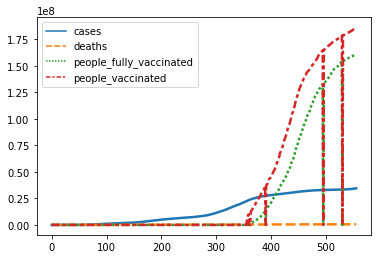

In [153]:
sns.lineplot(data = nation_ts, palette="tab10", linewidth=2.5)

In [132]:
state_ts.columns

Index(['state', 'date', 'cases', 'deaths', 'male', 'female', 'population',
       'female_proportion', 'FIPStxt', 'Stabr', 'POVALL_2018',
       'PCTPOVALL_2018', 'POV017_2018', 'PCTPOV017_2018', 'MEDHHINC_2018',
       'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'daily_vaccinations',
       'daily_vaccinations_per_million'],
      dtype='object')

In [102]:
county_current.loc[:,'cases100'] = county_current.loc[:,"cases"]/county_current.loc[:,"population"]*100
county_current.loc[:,'deaths100'] = county_current.loc[:,"deaths"]/county_current.loc[:,"population"]*100
county_current.loc[:,'deathratio'] = county_current.loc[:,"deaths"]/county_current.loc[:,"cases"]

In [131]:
Metro = {"Level 1": "Metro", 
         "Level 2": "Metro",
         "Level 3": "Metro",
         "Level 4": "Adjacent to Metro",
         "Level 5": "Not adjacent to metro",
         "Level 6": "Adjacent to Metro", 
         "Level 7": "Not adjacent to metro",
         "Level 8": "Adjacent to Metro",
         "Level 9": "Not adjacent to metro"
          }

county_current["Metro"] = county_current["Rural-urban_Continuum_Code_2013"].map(Metro)

<ipython-input-131-054a06b46758>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_current["Metro"] = county_current["Rural-urban_Continuum_Code_2013"].map(Metro)


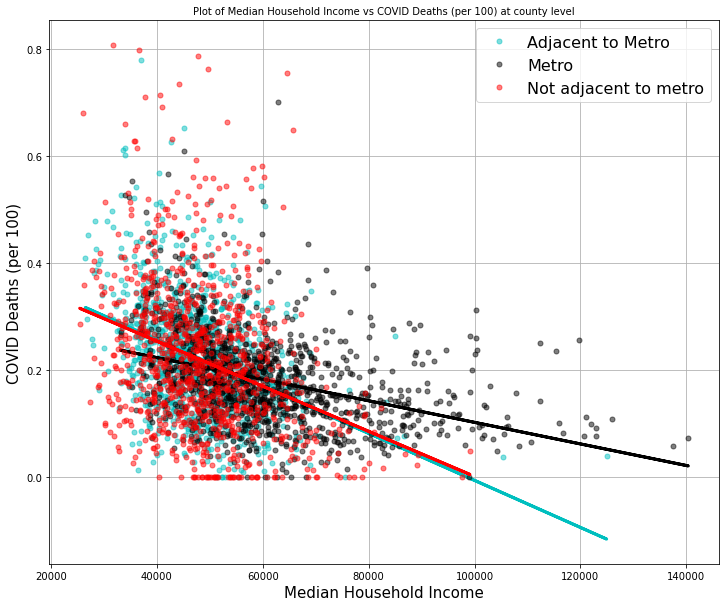

In [130]:
plt.figure(figsize=(12,10))
plt.title("Plot of Median Household Income vs COVID Deaths (per 100) at county level", fontsize = 10)
plt.xlabel("Median Household Income", fontsize = 15)
plt.ylabel("COVID Deaths (per 100)", fontsize = 15)
plt.grid(True)
colors = {'Metro':'k', 'Adjacent to Metro':'c', 'Not adjacent to metro':'r'}
groups = county_current.groupby('Metro')
for name, group in groups:
    plt.plot(group.MEDHHINC_2018, group.deaths100, color = colors[name], marker='o', linestyle='', markersize=5, label=name, alpha = 0.5)
    plt.plot(group.MEDHHINC_2018, np.poly1d(np.polyfit(group.MEDHHINC_2018, group.deaths100, 1))(group.MEDHHINC_2018), 
             color = colors[name], alpha = 1, linewidth=3)
    plt.legend(fontsize=16)
plt.show()

In [ ]:
statelonlat = pd.read_csv('data/StateLonLat.csv')
statelonlat.head()

In [ ]:
mergeCovState2 = pd.merge(mergeCovState, statelonlat, how='left', on = 'state')

In [ ]:
lis = []
for str in  mergeCovState2['date']:
    lis.append(int(str[-1]))
    
lis

In [ ]:
mergeCovState2["daylastdigit"] = lis
mergeCovState10days = mergeCovState2[mergeCovState2["daylastdigit"]== 0 ]
mergeCovState10days.head()

In [ ]:
fig = px.scatter_geo(mergeCovState10days, lon = "longitude", lat = "latitude", hover_name='state', size="cases",
               animation_frame="date", projection='albers usa')
fig.show()

In [ ]:
lis = []
for str in  county_ts['date']:
    lis.append(int(str[-1]))
lis

In [ ]:
county_ts["daylastdigit"] = lis
county_ts10days = county_ts[county_ts["daylastdigit"] == 0 ]
county_ts10days.head()

In [ ]:
fig = px.scatter_geo(county_ts, lon = "long_x", lat = "lat_x", hover_name='county_x', size="cases",
               animation_frame="date", projection='albers usa', color = "Rural-urban_Continuum_Code_2013")
fig.update_layout(
    legend=dict(
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            family="Courier",
            size=9,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    )
)
fig.show()